# AWS VPC Exercise

> I am recently starting to learn the AWS in this blog I'm gonna share the exercises of [VPC](https://aws.amazon.com/vpc/) I have done. The resource is from the [freeCodeCamp.org](https://www.youtube.com/watch?v=g2JOHLHh4rI) presented by [digitalcloud.training]( https://digitalcloud.training). I encourage you to watch it first.

- toc: true
- branch: master
- badges: true
- categories: [AWS]
- image: images/upsert.png

## Prerequisite

- Create a free [AWS Account](https://aws.amazon.com/).
- Download the [exercise code](https://digitalcloud.training/aws-vpc-deep-dive-download/)
- Install AWS Cli and config the [aws configure](https://docs.aws.amazon.com/cli/latest/userguide/cli-chap-configure.html)

## Create VPC

Name: MyVPC  
IPv4 CIDR Block: 10.0.0.0/16  

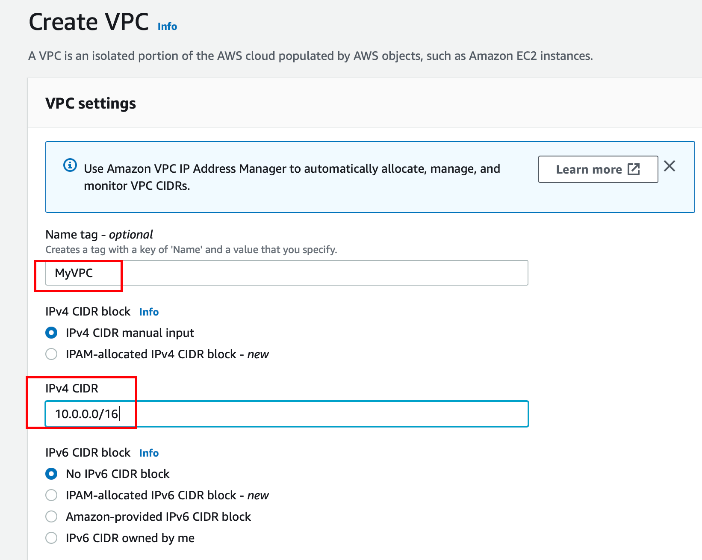

A route table was also created automatically by AWS.  
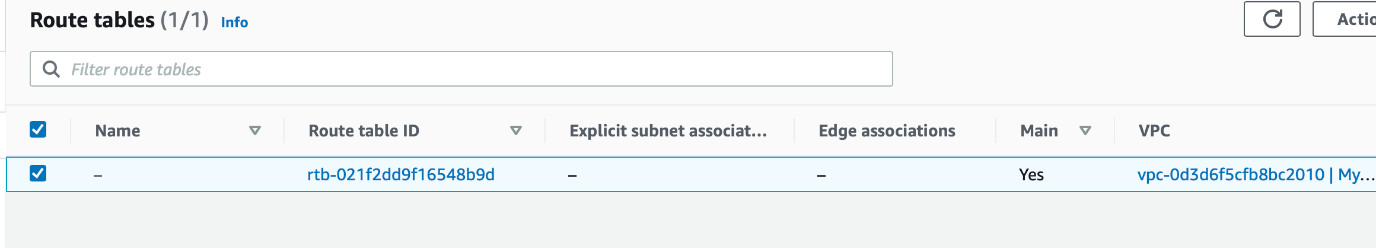

## Create Subnets

Name: **Public-1A**  
Availability Zone: **us-east-1a**  
IPv4 CIDR Block: **10.0.1.0/24**  
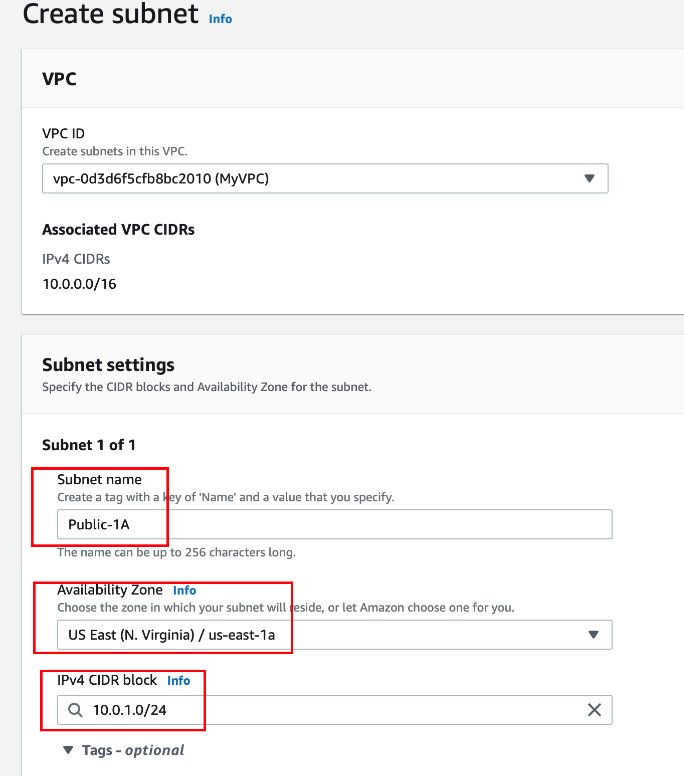

Name: **Public-1B**  
Availability Zone: **us-east-1b**  
IPv4 CIDR Block: **10.0.2.0/24**  
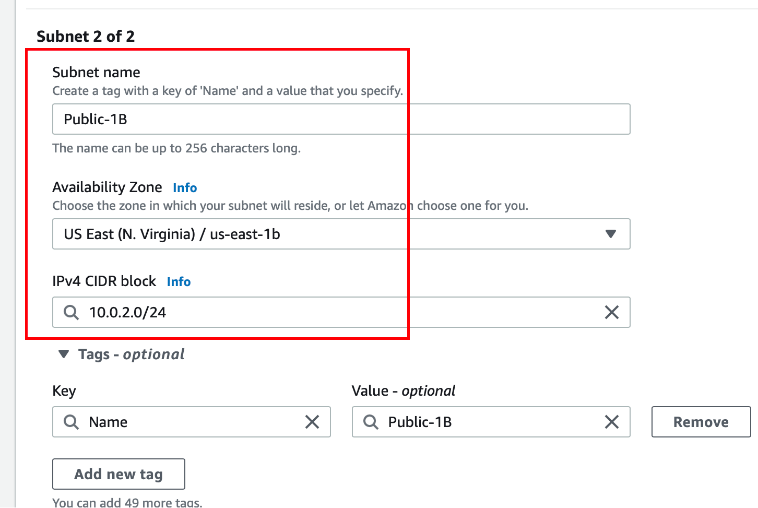

Name: **Private-1A**  
Availability Zone: **us-east-1a**  
IPv4 CIDR Block: **10.0.3.0/24**  
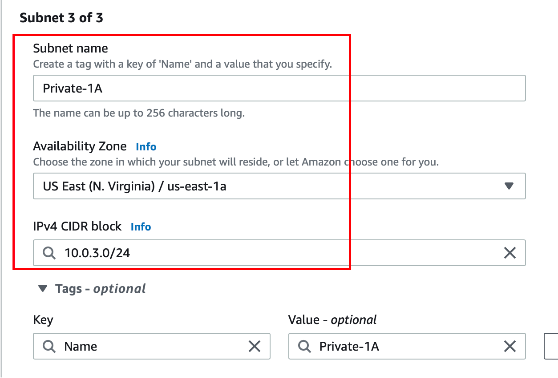

Name: **Private-1B**  
Availability Zone: **us-east-1b**  
IPv4 CIDR Block: **10.0.4.0/24**  
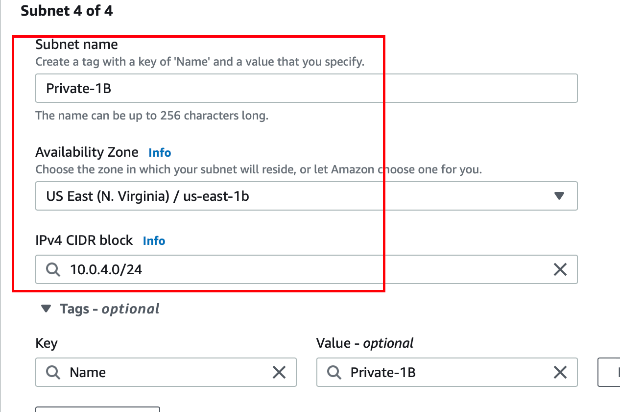


Finally, they look like this.  
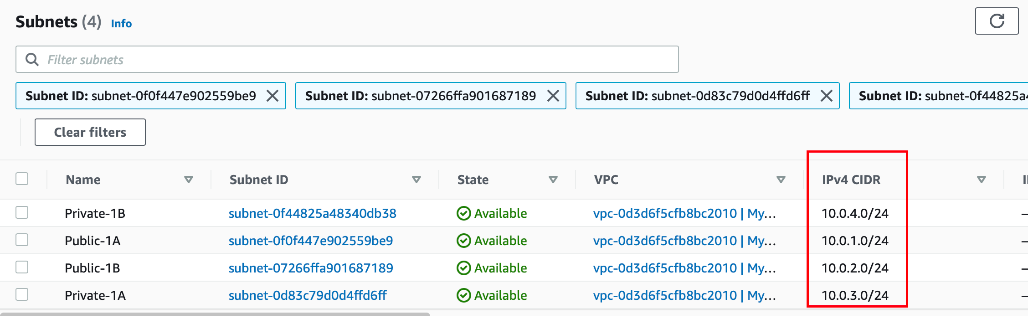

For the public subnets, we tick **'Enable auto-assign public IPv4 address'**.  
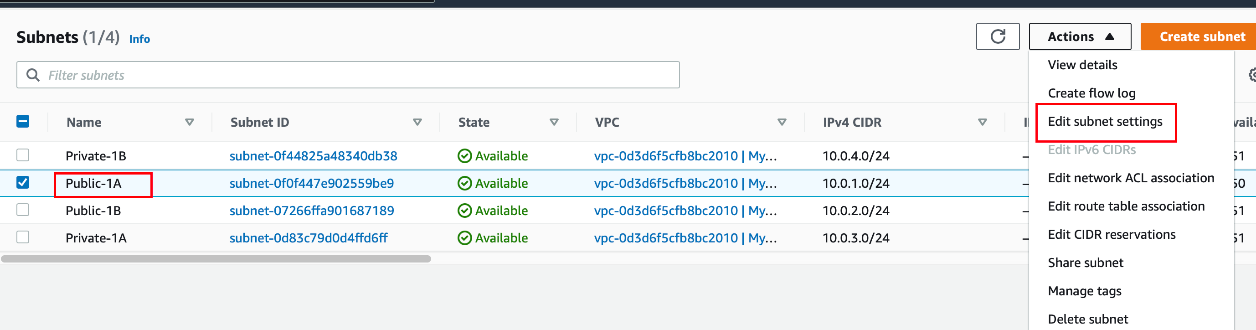  
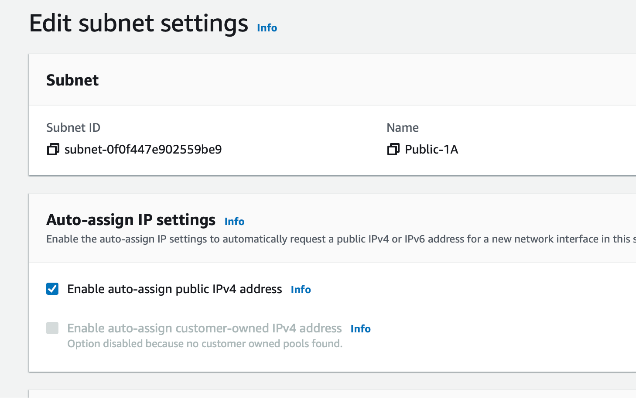

## Create private route table

Name: **Private-RT**  
VPC: **MyVPC**  
Subnet associations: **Private-1A, Private-1B**  
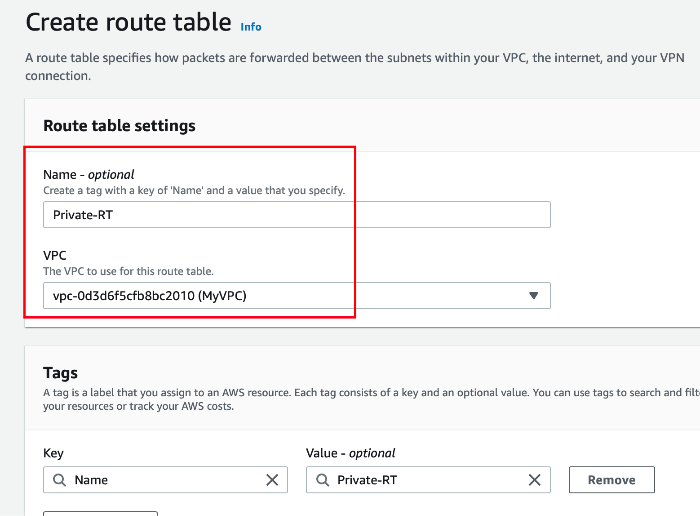

Change the name of default route table to 'MAIN' and associate the Private-1A and Private-1B to the route table.  
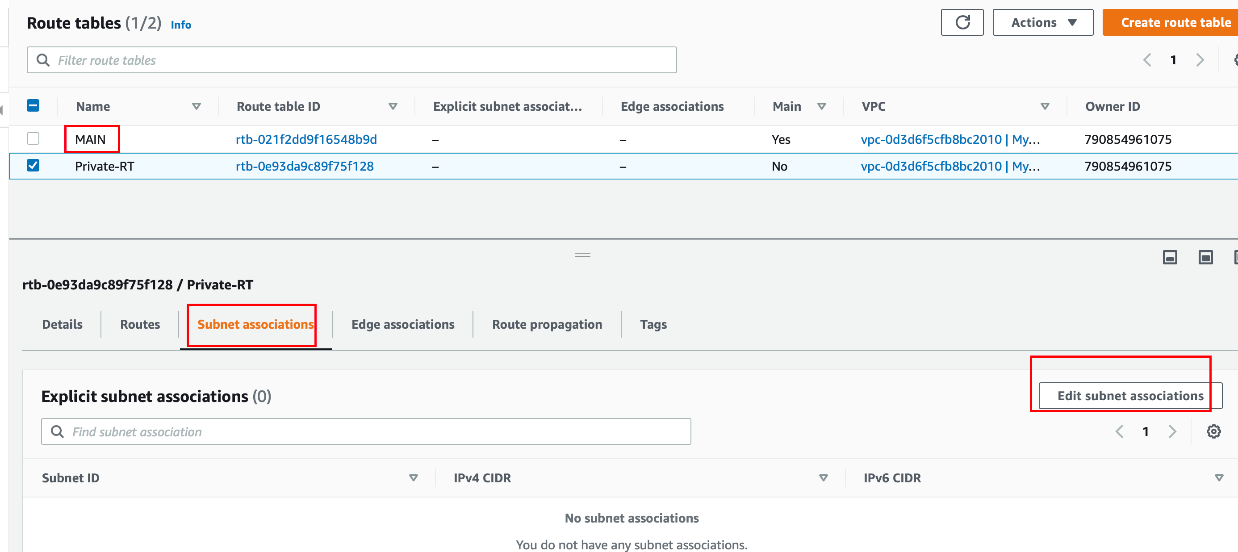  
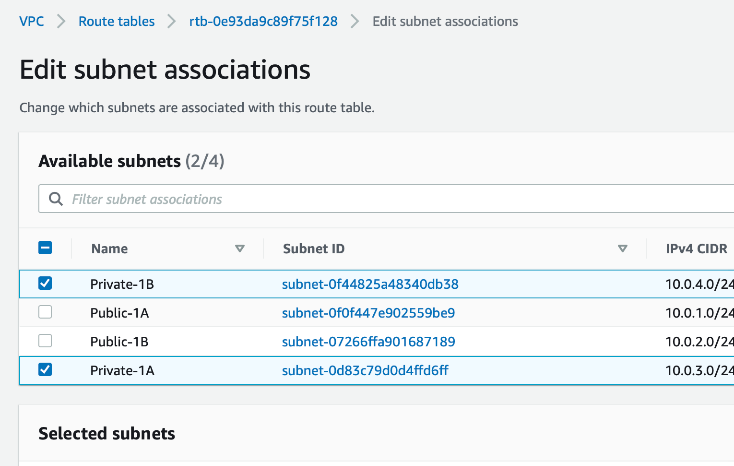  

# Create Internet Gateway

Name: **MyIGW**  
VPC: **MyVPC**  

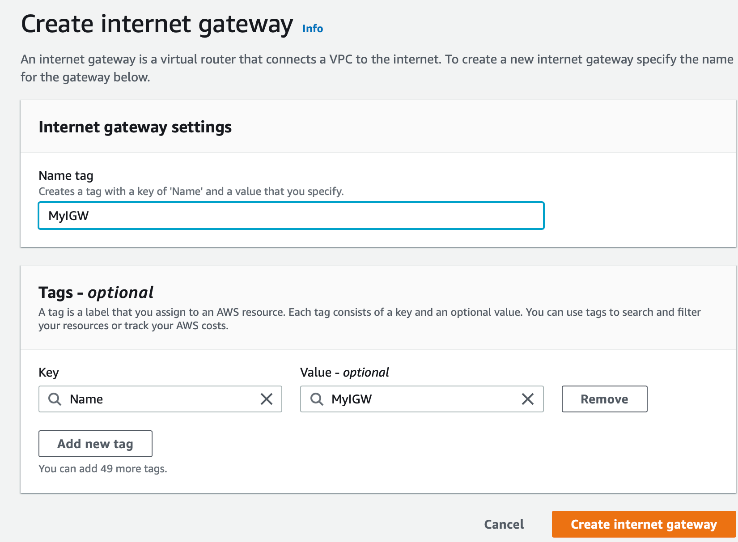  

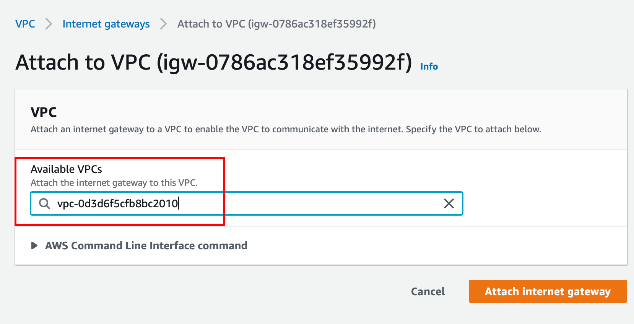

## Edit MAIN route table

Add **0.0.0.0/0** to internet gateway.  

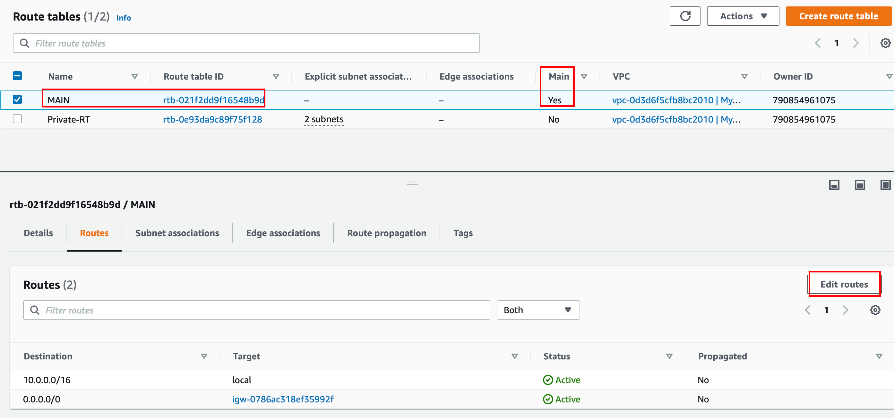  
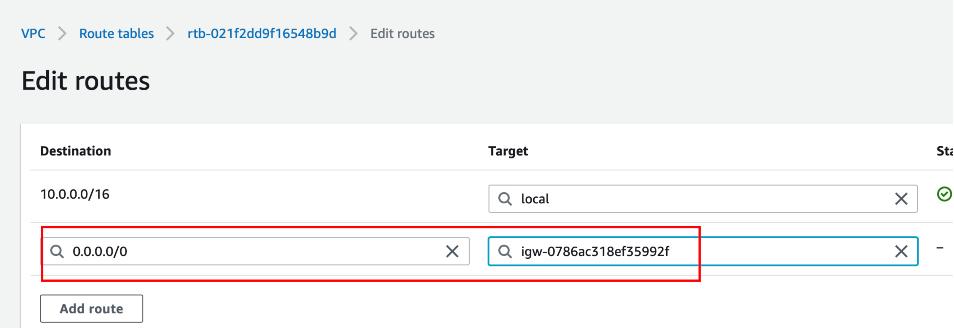

## [NAT Gateway](https://docs.aws.amazon.com/vpc/latest/userguide/vpc-nat-gateway.html)

- Create NAT Gateway  
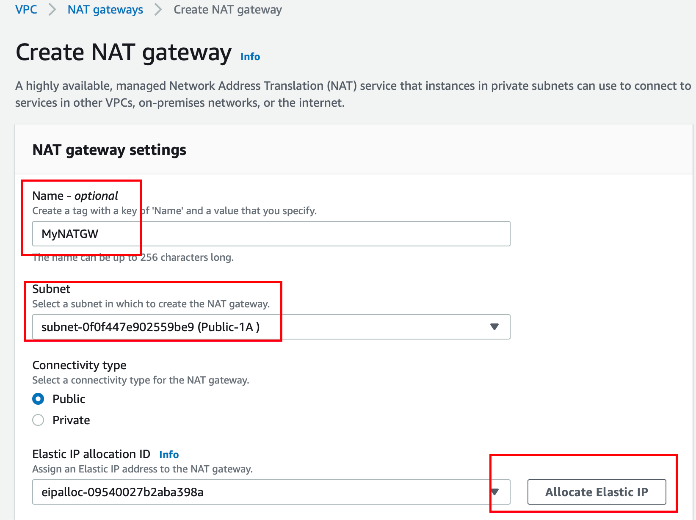

- Go to PrivateRT and edit the route 0.0.0.0/0 to NAT Gateway  
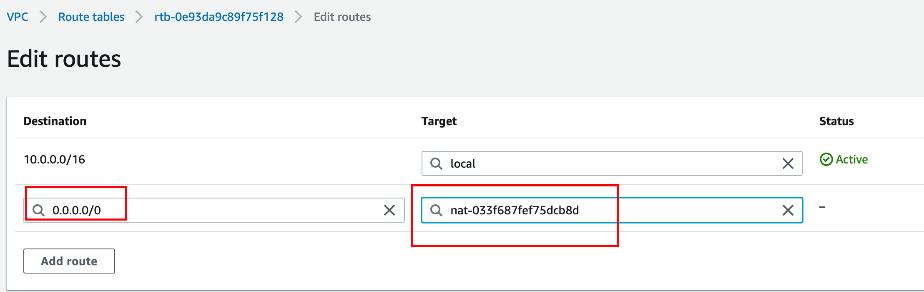

## Configure [Security Groups](https://docs.aws.amazon.com/vpc/latest/userguide/VPC_SecurityGroups.html) and NACLs

- Create Public-Web security group  
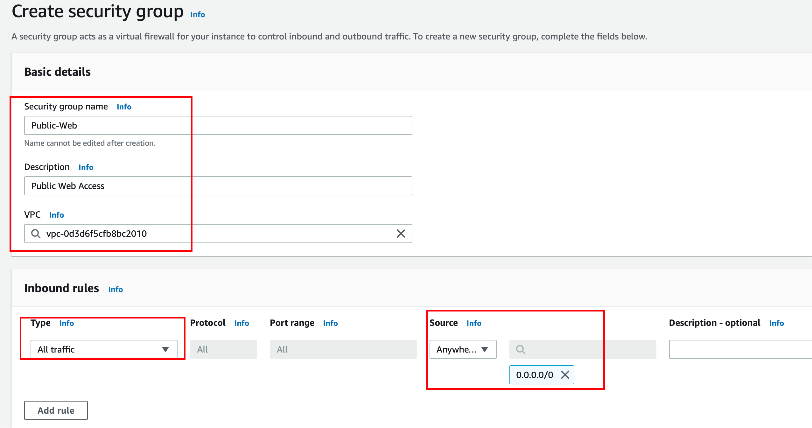

- Private-App: Private App Access, Inbound rule: **http/80 with source Public-Web, make sure the inbound comes from the web app front end in the Public-Web security group**

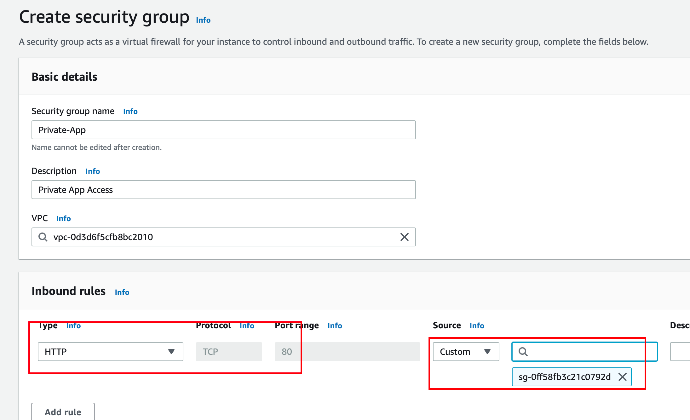

## Launch EC2s

Use the following command to launch the EC2s. 
**aws ec2 run-instances --image-id <value> --instance-type <value> --security-group-ids <value> --subnet-id <value> --key-name <value> --user-data <value>**  

The variables that need to be filled:
- image-id: [Amazon Machine Images (AMI)](https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/AMIs.html), here we use ami-0ed9277fb7eb570c9
- instance-type: t2.micro
- security-group-ids: Public-Web security group.
- subnet-id: we create two EC2s in Public 1A and 1B, one EC2 in Private 1B.
- key-name: [key pairs](https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/ec2-key-pairs.html) of EC2.
- user-data are needed to be filled: the file '/user-data-subnet-id.txt' in [exercise code](https://digitalcloud.training/aws-vpc-deep-dive-download/)


    
Once we have these ready we run the following script(Make sure the aws cli installed and configured before this).  
- Launch instance in Public 1A  
aws ec2 run-instances --image-id ami-0ed9277fb7eb570c9 --instance-type t2.micro --security-group-ids sg-0ff58fb3c21c0792d --subnet-id subnet-0f0f447e902559be9 --key-name ec2_cloud --user-data file://code/user-data-subnet-id.txt
    
- Launch instance in Public 1B  
aws ec2 run-instances --image-id ami-0ed9277fb7eb570c9 --instance-type t2.micro --security-group-ids sg-0ff58fb3c21c0792d --subnet-id subnet-07266ffa901687189 --key-name ec2_cloud --user-data file://code/user-data-subnet-id.txt

- Launch instance in Private 1B  
aws ec2 run-instances --image-id ami-0ed9277fb7eb570c9 --instance-type t2.micro --security-group-ids sg-0ff58fb3c21c0792d --subnet-id subnet-0f44825a48340db38 --key-name ec2_cloud --user-data file://code/user-data-subnet-id.txt

Finally three EC2 are launched.  

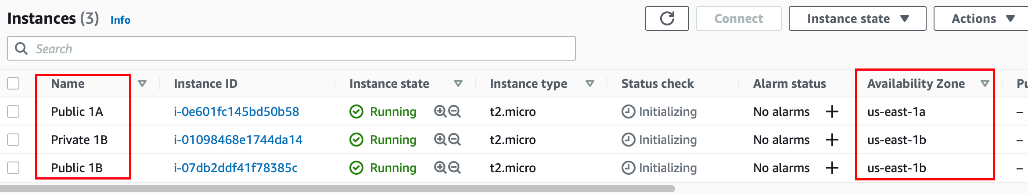  
Visit the Instances in Public 1A and 1B.  
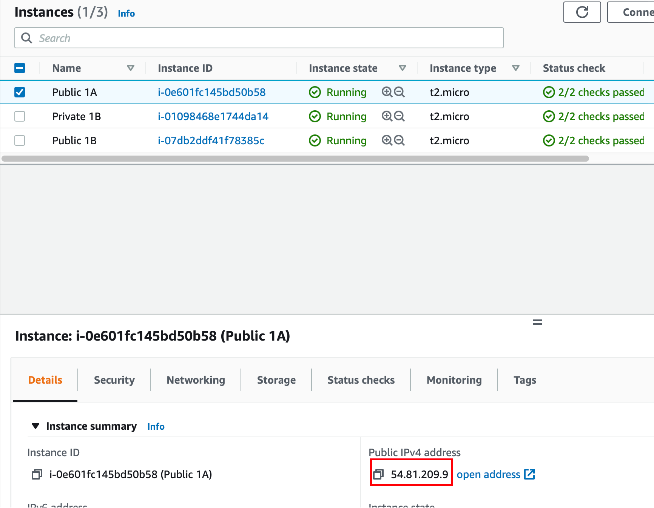 

We see the response from the server: "This instance is in the subnet wih ID: subnet-0f0f447e902559be9".  
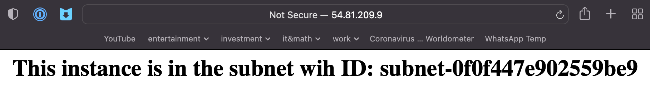  
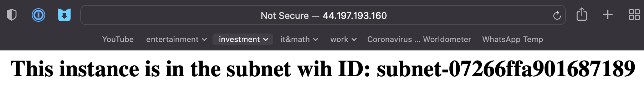  

Change inbound rule of Public-Web security group, set the source to "my ip". Then try it also with another IP(turn VPN on). Change it back after the experiment.  
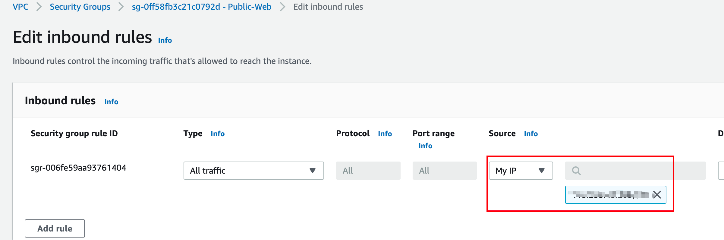   

Once the VPN is turned on, the process bar was hardly moving which means the "block" was working.  
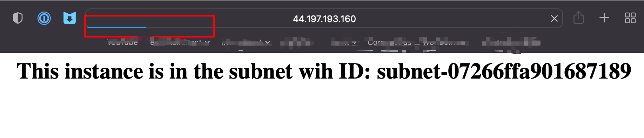

Change it back after the testing.  
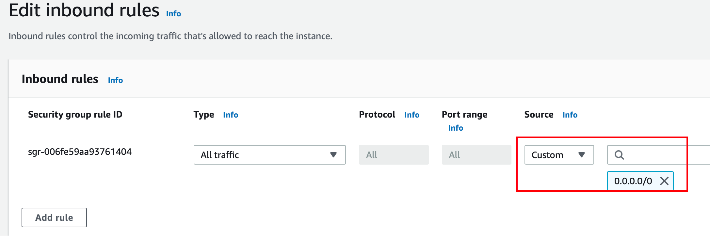

Test the internal network with SSH.  

Ping from Public 1A to Public 1B  
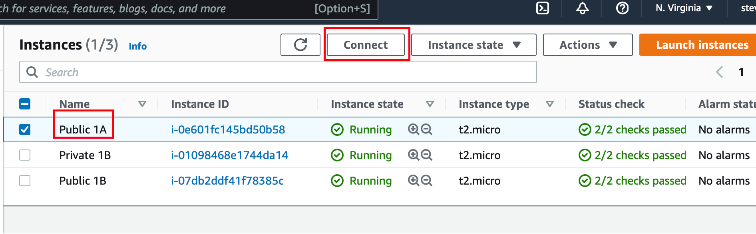  
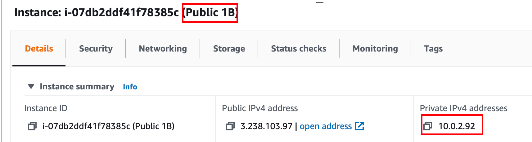  
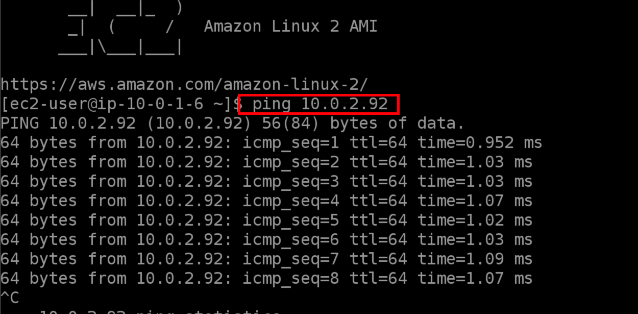

Ping from Public 1A to Private 1B  
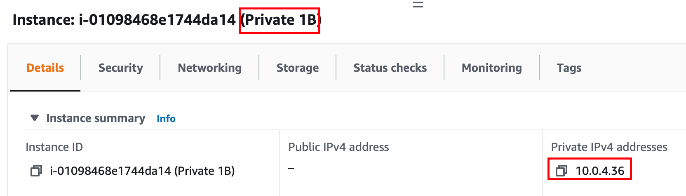  
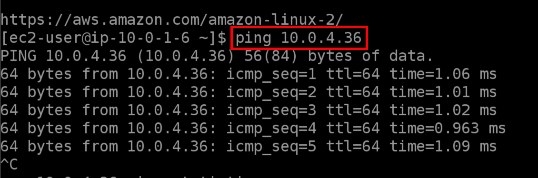  


Change the security group of EC2 Private 1B to Private-App  
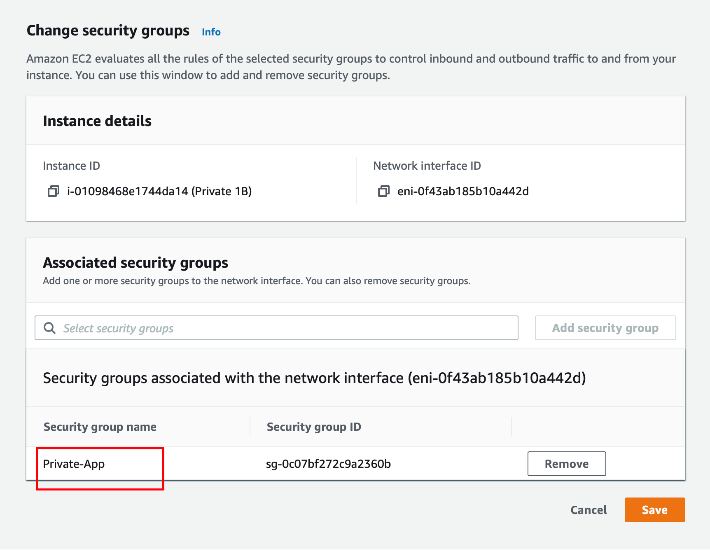  
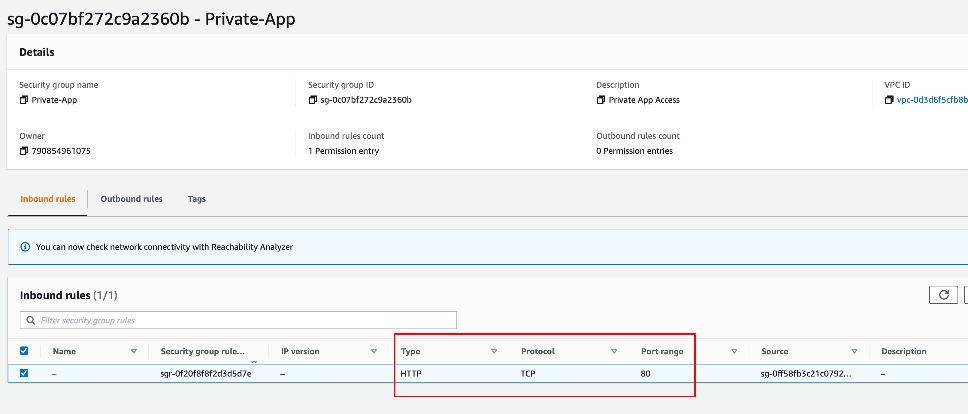  
In the Private-App, only HTTP/80 was configured that Ping(ICMP) didn't work and CURL(Http) worked from Public 1A to Private 1B  
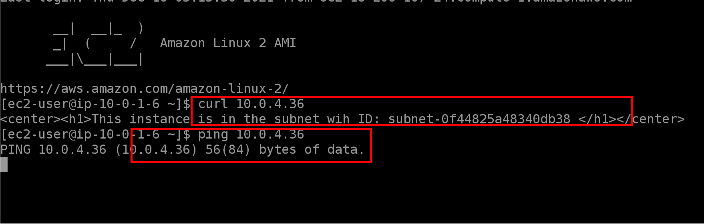

# Conclusion

I finished this exercise and it makes me understand the core concepts of VPC. Potentially I may go to get some certificates and hopefully I can plan a schedule for it.